# Лекция 3. Состав и характеристики некоторых машинных команд микропроцессора

1. Представление положительных и отрицательных чисел в компьютере.
2. Базовые арифметические операции.
3. Битовые и логические операции.
4. Работа со стеком. Параметры командной строки.
5. Примеры на языке ассемблера.

## 1. Представление положительных и отрицательных чисел в компьютере.

При обработке двоичных чисел вместо знаков плюс и минус используется специальный знаковый разряд, за который принимается самый старший (левый) бит двоичного числа. Если знаковый бит равен 1, то число считается отрицательным.

Код, полученный добавлением знакового разряда к двоичному коду числа по абсолютной величине называется **прямым кодом**. Такой код используется для передачи данных, для арифметических действий чаще используется **обратный и дополнительный** коды.

**Обратный код отрицательного числа** равен инверсии прямого кода положительного числа с той же абсолютной величиной.

**Дополнительный код отрицательного числа** равен обратному коду этого же числа плюс единица к младшему разряду.

**Прямой, обратный, дополнительный коды положительных чисел** одинаковы. Соответствие между прямым, обратным и дополнительным кодами чисел от $+5_{10}$ до $-5_{10}$ демонстрирует следующая таблица:

|Десятичная запись|Прямой код|Обратный код|Дополнительный код|
|---|---|---|---|
|+5|0101|0101|0101|
|+4|0100|0100|0100|
|+3|0011|0011|0011|
|+2|0010|0010|0010|
|+1|0001|0001|0001|
|+0|0000|0000|0000|
|-0|1000|1111|0000|
|-1|1001|1110|1111|
|-2|1010|1101|1110|
|-3|1011|1100|1101|
|-4|1100|1011|1100|
|-5|1101|1010|1011|

Чтобы лучше понять, как устроен дополнительный код, можно провести такую аналогию с фиксированной разрядной сеткой: допустим у нас три разряда, тогда число нуль мы представляем $000_2$, теперь вычтем из этого числа единицу в предположении, что у числа $000_2$ есть невидимый значащий разряд, т.е. оно на самом деле $1000_2 = -0_{10}$. Тогда при двоичном вычитании мы получим $1000_2-0001_2 = 0111_2 = -1_{10}$. Иными словами **в дополнительном коде число $-1_{10}$ при любой разрядной сетке представляется единицами в каждом разряде**. Например, для байта число $11111111_2$ представляет не привычное нам $255_{10}$, а $-1_{10}$ и т.д.

Теперь продолжим вычитать единицу для трех разрядов:
$$000_2-001_2 = 111_2 = -1_{10}$$
$$111_2-001_2 = 110_2 = -2_{10}$$
$$110_2-001_2 = 101_2 = -3_{10}$$
$$101_2-001_2 = 100_2 = -4_{10}$$

Итак, для разрядной сетки из трех бит у нас получается:

|Комбинация|Беззнаковое представление|Знаковое представление в дополнительном коде|
|----|----|---|
|$$000_2$$|$$0_{10}$$|$$0_{10}$$|
|$$001_2$$|$$1_{10}$$|$$1_{10}$$|
|$$010_2$$|$$2_{10}$$|$$2_{10}$$|
|$$011_2$$|$$3_{10}$$|$$3_{10}$$|
|$$100_2$$|$$4_{10}$$|$$-4_{10}$$|
|$$101_2$$|$$5_{10}$$|$$-3_{10}$$|
|$$110_2$$|$$6_{10}$$|$$-2_{10}$$|
|$$111_2$$|$$7_{10}$$|$$-1_{10}$$|

Достоинство обратного и дополнительного кода состоит в том, что для них  обычные правила сложения и вычитания двоичных кодов одинаковы как для знаковых, так и беззнаковых чисел.

При сложении чисел в обратном или дополнительном коде знаковые разряды сумируются также как и другие разряды.

**Если при суммировании обратных кодов имеет место перенос из знакового разряда, то он рассматривается как перенос в младший разряд суммы, такой перенос называется циклическим.**

$$+4_{10}-5_{10} = -1_{10} = 0100_2+1010_2 = 1110_2$$
$$+5_{10}-4_{10}=+1_{10} = 0101_2+1011_2 = 0001_2$$
В последнем случае как раз потребовался циклический перенос.

**При суммировании дополнительных кодов перенос из знакового разряда игнорируется.**

$$+4_{10}-5_{10} = -1_{10} = 0100_2+1011_2 = 1111_2$$
$$+5_{10}-4_{10}=+1_{10} = 0101_2+1100_2 = 0001_2$$

На практике обычно используют именно дополнительный код.

Сложение в обратном и дополнительном коде может быть связано с явлением переполнения разрядной сетки, что ведет к неправильному результату. 

Например, 
$$+4_{10}+5_{10} = +9_{10} = 0100_2+0101_2 = 1001_2$$
Признаком переполнения является отрицательный результат при сложении положжительных чисел или положительный результат при сложении отрицательных чисел. Для борьбы с переполнением приходится вводить дополниительные нулевые разряды:
$$00100_2+00101_2=01001_2$$

## 2. Базовые арифметические операции.

Итак, числа в процессоре могут быть только целые: **знаковые и беззнаковые**. 

Вещественные числа представляются в двоичном виде как 32-, 64-, 80-битные значения, но оперировать вещественными значениями может только математический сопроцессор.

**Беззнаковые числа** представляются обычным преобразованием числа в двоичное; следовательно, диапазон значений беззнаковых чисел $0\ldots 2^n-1$, где n – это
разрядность числа. 

У **знаковых чисел** старший бит обозначает знак числа: если старший бит – единица, то число отрицательное. Знаковые числа представляются в **дополнительном коде**. Диапазон знакового числа: $-2^{n-1}\ldots 2^{n-1}-1$. 

На уровне машинных команд между этими двумя видами чисел нет никакой разницы. Находящийся в памяти или в одном из регистров операнд представляет собой (в зависимости от используемой модели адресации) 8-, 16- или 32-разрядное число, все разряды которого абсолютно равноправны. Понятие знака введено исключительно для возможности манипулирования (на логическом уровне) с отрицательными числами – для процессора все числа одинаковы, а для программиста они отличаются тем, что для одних высший разряд выступает в качестве информации о знаке числа (знаковые числа), а для других все разряды
несут информации о самом числе (беззнаковые числа). 

Например, для 16-битного беззнакового числа диапазон значений от $0$ до $65535 =2^{16}$, для 16-битного знакового числа диапазон значений от $-32768=-2^{15}$ до $+32767 =2^{15}-1$ . 

Принципы сложения и вычитания целых, знаковых и беззнаковых чисел одинаковые, т. е. процессору совершенно безразлично, с какими числами он работает – складывает и вычитает он всегда одинаково, но всё-таки, чтобы программист знал результат операции, процессор устанавливает/сбрасывает флаги переполнения и переноса в зависимости от результата. 

При вычислениях очень важными являются **флаги переполнения и переноса**.

В общем случае **флаг переноса устанавливается** в единицу всякий раз, когда единица выносится за пределы разрядной сетки (при операции сложения) или занимается
из этих пределов (при операции вычитания). 

Флаг переполнения используется как индикатор переполнения при работе с числами со знаком. **Флаг переполнения**  устанавливается в 1, если результат операции над числами со знаком выйдет за пределы допустимого диапазона результата, и в 0 – в противном случае. 

Рассмотрим некоторые примеры сложения чисел.

|Операция|Флаги|Интерпретация для беззнаковых|Интерпретация для знаковых|
|----|----|----|----|
|$$10000000_2+10000000_2=00000000_2$$|CF=1, OF=1|128+128=0 (неверно)|(-127)+(-127)=0 (неверно)|

 В этом случае перенос произойдёт только за пределы разрядной сетки, а переноса в седьмой бит (знаковый) не произойдёт. В этом случае устанавливаются в единицу и флаг переноса
(CF), и флаг переполнения (OF). Результат сложения как знаковых, так и беззнаковых чисел будет неверен.

|Операция|Флаги|Интерпретация для беззнаковых|Интерпретация для знаковых|
|----|----|----|----|
|$$01000000_2+01000000_2=10000000_2$$|CF=0, OF=1|64+64=128 (верно)|64+64=-128 (неверно)|
|$$01111111_2+00000001_2=10000000_2$$|CF=0, OF=1|127+1=128 (верно)|127+1=-128 (неверно)|

 Это случаи, когда устанавливается только флаг переполнения. В обоих приведённых случаях происходит перенос единицы только в знаковый разряд, а переноса за пределы разрядной сетки не происходит. Результат сложения знаковых чисел становится неправильным, результат сложения беззнаковых чисел является правильным.
 
 |Операция|Флаги|Интерпретация для беззнаковых|Интерпретация для знаковых|
|----|----|----|----|
|$$11111100_2+00000101_2=00000001_2$$|CF=1, OF=0|252+5=1 (неверно)|-4+5=1 (верно)|
|$$01100000_2+11100000_2=01000000_2$$|CF=1, OF=0|96+224=64 (неверно)|96+(-32)=64 (верно)|
|$$11000000_2+11000000_2=10000000_2$$|CF=1, OF=0|192+192=128 (неверно)|-64+(-64)=-128 (верно)|
|$$11111111_2+00000001_2=00000000_2$$|CF=1, OF=0|255+1=0 (неверно)|(-1)+1=0 (верно)|

В этих случаях будет выставлен только флаг переноса.  Во всех этих примерах происходит как перенос единицы в знаковый разряд, так  и перенос единицы за пределы разрядной сетки. Результат сложения беззнаковых чисел в таких случаях неверен, а результат сложения знаковых чисел – верен.
При выполнении вычитания правила остаются теми же – за исключением того, что происходит не перенос единицы в знаковый разряд или за пределы разрядной сети, а заём из знакового разряда или из-за пределов разрядной сетки.

**Если подытожить всё вышесказанное, можно сделать вывод, что при сложении
(вычитании) чисел без знака результат будет неверным (с переполнением), если
флаг переноса CF равен единице. При сложении (вычитании) чисел со знаком результат будет неверным (с потерей знака), если флаг переполнения OF установлен
в единицу.**

Таким образом, разница между числами со знаком и без знака возникает только на этапе интерпретации их значений или в результате операций с ними.

Итак, в ассемблере операции сложения и вычитания над целыми числами производятся соответственно командами **add**, **sub**. Обе команды имею два операнда, причем первый операнд обозначает одно число, участвующее в операции и место, куда помещается результат операции. Второй операнд - второе число в операции. Исходя из этого, ясно, что первый операнд может быть только регистром или памятью, т.е. не может быть непосредственным числом. Второй операнд может быть любым.

Примеры:

In [ ]:
place dq ?
...
mov rax, 5
mov rbx, 3

add rax, rbx ; В результате rax = 8

mov [place], 6
mov rbx,place
sub rax, [rbx];В результате rax = 2

**Подчеркнем, что при сложении, вычитании процессор не знает, работает ли он со знаковыми, или беззнаковыми числами. Все операции с ними он выполняет абсолютно аналогично. Помнить о том, про какие числа идет речь, должен программист, который, ориентируясь по флагам, должен интерпретировать полученные результаты.**

Наличие флага переноса позволяет организовать сложение и вычитание чисел, не помещающихся в регистры способом, похожим на вычитание, сложение в столбик. Для этого предусмотрены команды **adc, sbb** - сложение и вычитание с учетом переноса.

Команда **adc** складывает числа как **add**, но добавляет к итоговому результату флаг переноса **CF**, команда **sbb** вычитает числа как **sub** и вычитает флаг переноса из итогового результата.

Например, очень распространены случаи, когда необходимо сложить два 64-разрядных числа в 32-разрядной программе (и вообще в любой программе, работающей в защищённом
режиме). Как известно, в защищённом режиме без использования математического
сопроцессора нельзя одной командой сложить два 64-разрядных числа. В таких случаях сложение будет происходить в несколько этапов в зависимости от того, какого
размера числа необходимо сложить. Сложение 64-разрядных чисел будет происходить в два этапа: сначала сложение младших частей, потом – старших частей с учётом того, произошёл ли перенос единицы в старшую часть (проще говоря, с учётом
того, произошло ли переполнение при сложении младших частей). Таким образом,
при сложении младших частей надо использовать команду **add**, а при сложении
старших частей – команду **adc**. Использование команды ADC обусловлено тем,
что при сложении младших частей операнды выступают как беззнаковые числа;
следовательно, индикатором переполнения будет флаг CF.

В приведенном ниже коде приведен пример сложения двух беззнаковых 64-разрядных чисел, каждое из которых записано в виде отдельной переменной.

In [ ]:
Val1 dq 05B493E89C0F44Ah
Val2 dq 06A4937796D80D1h
...
mov eax, dword [Val1] 
mov edx, dword [Val1+4]
add eax, dword [Val2]
adc edx, dword [Val2+4]
jnc @f
; произошло переполнение
@@:
; успешное вычисление

В случае, когда числа представлены в одной переменной, следует помнить, что
все числа в памяти хранятся в обратном порядке, т. е. сначала идут младшие байты, а потом старшие.

В приведенном коде также использованы так называемые **безымянные метки**.

**Безымянные метки** – это метки с именем @@:.

Для осуществления перехода на безымянную метку нужно указать в качестве метки значения: если нужен переход на ближайшую метку после команды перехода, то следует указать @f, а если надо перейти на ближайшую метку до команды перехода, то @b.

In [ ]:
@@:
  ;code
  Ja @f ; переход вперёд
  ;code
  Jz @b ; переход назад
  ;code
@@:
...

К операциям сложения и вычитания также можно отнести:
- **inc** - прибавление единицы к содержимому операнда;
- **dec** - вычитание единицы из содержимого операнда;
- **xadd** – сложение, с предварительным обменом данных между операндами;
- **neg** - изменяет знак числа на противоположный, то есть положительное число делает отрицательным, а отрицательное - положительным. Реализуется вычитанием операнда из нуля.
- **cmp** - делает тоже самое, что и **sub**, но в отличие от нее никуда не помещает результат, только меняя флаги.

**Умножение, деление.**

Команда **mul** – беззнаковое умножение. 

Синтаксис команды: **mul <операнд>**. 

Команда **mul** умножает операнд с регистром EAX(AL, AX, RAX) и сохраняет его
в регистрах EDX:EAX (AX, DX:AX, RDX:RAX). Операндом может быть регистр
или значение в памяти. В таблице представлены возможные результаты работы
этой команды.

|Размер операнда| Результат|
|---|---|
|1 байт| **AX = AL * <операнд>**|
|2 байта| **DX:AX = AX * <операнд >**|
|4 байта| **EDX:EAX = EAX * <операнд >**|
|8 байт| **RDX:RAX = RAX * <операнд >**|

Команда **div** – беззнаковое деление.

Синтаксис команды: **div <операнд>**. 

Команда **div** делит регистры EDX:EAX (AX, DX:AX, RDX:RAX) на операнд и сохраняет результат деления в EAX (AL, AX, RAX), а также остаток от деления в EDX
(AH, DX, RDX). В таблице показаны возможные результаты работы этой команды.

|Размер операнда| Источник| Результат деления| Остаток деления|
|---|---|---|---|
|1 байт| AX| AL| AH|
|2 байта| DX:AX| AX| DX|
|4 байта| EDX:EAX| EAX| EDX|
|8 байт| RDX:RAX| RAX| RDX|

Команда **imul** – знаковое умножение. Команда может принимать до трёх операндов. У этой команды есть три формы записи в зависимости от того, сколько операндов указано.
1. Первая форма – только один операнд. Команда работает точно так же, как и **mul**, только умножение происходит с учётом знака.
2. Вторая форма – два операнда. Синтаксис: imul <операнд1>, <операнд2>. В качестве первого операнда может выступать только регистр общего назначения, а вторым операндом может быть регистр, значение памяти или непосредственно значение. Операнды могут быть любого размера, но если второй операнд – непосредственно значение, то оно не может быть размером 8 байт. Первый операнд умножается с учётом знака на второй, и результат сохраняется в первом операнде.
3. Третья форма – это три операнда. Формат: imul <операнд1>, <операнд2>, <операнд3>. В качестве первого операнда может выступать только регистр общего назначения. В качестве второго операнда может выступать регистр или значение памяти. Первый и второй операнды должны быть одинакового размера. Третий операнд может быть только непосредственным значением и не может быть размером 8 байт. При использовании этой формы команда умножает с учётом знака второй операнд на третий и результат сохраняет в первом.

Команда **idiv** – знаковое деление. Команда по результату работы полностью идентична команде **div**. Отличие команды IDIV от DIV заключается в том, что если операнды имеют разные знаковые биты, то результат (частное и остаток) будет отрицательным; если же у операндов знаковые биты будут равны, то результат (частное и остаток) будет положительным.

Команды **div**, **idiv** не влияют на регистр флагов. 

Команда **mul** устанавливает флаги OF и CF в ноль, если старшая часть результата (AH, DX, EDX, RDX) равна нулю; в любом другом случае эти биты устанавливаются в единицу.

При использовании команды **imul** в первой форме флаги OF и CF устанавливаются в единицу, если какие-либо значащие биты переносятся в старшую часть результата (AH, DX, EDX, RDX), и в ноль, если в старшую часть результата переносов не было. Таким образом, если флаги OF и CF сброшены, то результат может быть считан только из младшей части, и он будет верным.

При использовании команды **imul** во второй и третьей форме флаги OF и
CF устанавливаются в единицу, если размерность результата больше, чем размер
операнда, указанного в качестве результата. Таким образом, если после операции умножения выставлены флаги OF и CF, значит, произведение в результирующем операнде неверное (усечённое).

## 3. Битовые и логические операции.

Следующие по важности команды – это команды, осуществляющие логические
операции. Есть несколько базовых логических операций: операция «или» (команда **OR**), логическое «и» (команда **AND**), логическое отрицание (команда **NOT**),
«исключающее или» (команда **XOR**).

Команда **or** – операция битового логического ИЛИ. 

Синтаксис команды: **or <назначение>, <источник>**. 

Эта команда производит побитовое логическое сложение между переданными операндами и сохраняет результат в назначении. Операнды могут быть размером 1, 2, 4, 8 байт. При логическом сложении результат является единицей (истиной) при истинности любого из операндов.

Команда **and** – операция битового логического И. 

Синтаксис команды: **and <назначение>, <источник>**. 

Эта команда производит побитовое логическое умножение переданных операндов и сохраняет результат в назначении. Операнды могут быть размером 1, 2, 4, 8 байт. При логическом умножении результат является единицей (истиной) при истинности обоих операндов.

Команда **not** – операция битового логического отрицания. 

Синтаксис команды: **not <назначение>**. 

Эта команда производит побитовое логическое отрицание операнда. При логическом отрицании результат является отрицанием операнда, т. е. если 1, то получается 0, если 0 – то получается 1. Операнд может быть размером 1, 2, 4, 8 байт.

Команда **xor** – операция битового исключающего ИЛИ. 

Синтаксис команды: **xor <назначение>, <источник>**. 

Команда **xor** производит операцию побитового исключающего «или» над переданными операндами и сохраняет результат в назначении. Операнды могут быть размером 1, 2, 4, 8 байт. Если операнды одинаковые, то результат 0, если разные – то 1. Таким образом, если указать в качестве обоих операндов один и тот же регистр, то регистр будет обнулён. Этот приём бывает очень полезным при оптимизации кода.

Все четыре вышеперечисленные логические операции в зависимости от результата операции изменяют соответствующие биты в регистре флагов.

**Сдвиги.**

**Сдвиг – это побитовый сдвиг операнда вправо или влево**. 

Например, сдвиг числа $11101001$ на 3 влево в результате даст $01001000$. 

Все команды сдвига имеют одинаковый синтаксис: **команда <назначение>, <количество битов>**. 

Сдвиги бывают разных видов: **циклические, арифметические и логические**. 

**shl** – логический сдвиг влево. Команда производит сдвиг операнда влево на
указанное количество бит. В освободившиеся справа биты заносятся нули. **Значение CF совпадает со значением бита, который последним был вытеснен за левый
край операнда**. **Если количество битов не равно 1, то признак переполнения OF не 
определен. Если же количество битов равно 1, тогда OF = 0, при том что 2 старших
бита исходного значения операнда назначения совпадали; иначе OF = 1.**

**shr** – логический сдвиг вправо. Команда производит сдвиг операнда вправо на указанное количество битов. В освободившиеся справа биты заносятся нули. **Значение CF совпадает со значением бита, который последним был вытеснен за правый край операнда**. **Если бит знака сохраняет свое значение, то признак переполнения OF = 0, иначе OF = 1. **

**sal** – арифметический сдвиг влево. Команда полностью идентична команде **shl**  Это одна и та же команда, только имена разные.

**sar** – арифметический сдвиг вправо. Команда идентична команде **shr**, за исключением того, что каждый вновь вставленный слева бит равен самому старшему
биту изначального операнда. Таким образом, при арифметическом сдвиге вправо
операнд не изменит свой знак. Например, сдвиг числа $10101001$ на 3 бита вправо
в результате даст $11110101$.

**rol** – циклический сдвиг влево. Команда сдвигает операнд влево на указанное количество битов. Бит, который выходит за левый предел, вставляется справа. Значение CF совпадает со значением бита, который последним был вытеснен за левый край операнда. Если количество битов не равно 1, то признак переполнения OF не определен. Если же количество битов равно 1, то во флаг OF заносится результат выполнения операции исключающего «или», примененной к 2 старшим битам исходного значения операнда.

**ror** – циклический сдвиг вправо. Команда сдвигает операнд вправо на указанное количество битов. Бит, который выходит за правый предел, вставляется слева. Значение CF совпадает со значением бита, который последним был вытеснен за правый край операнда. Если количество битов не равно 1, то признак переполнения OF не определен. Если же количество битов равно 1, то в OF заносится результат выполнения операции исключающего «или», примененной к 2 старшим битам результата.

**rcl** – циклический сдвиг влево через флаг CF. Команда сдвигает операнд влево на указанное количество битов. Бит, который выходит за левый край, заносится во флаг CF, а старое значение CF заносится в освободившийся правый бит. Если количество битов не равно 1, то признак переполнения OF не определен. Если же количество битов равно 1, то в OF заносится результат выполнения операции исключающего «или», применённой к 2 старшим битам результата.

**rcr**  – циклический сдвиг вправо через флаг CF. Команда сдвигает операнд
вправо на указанное количество битов. Бит, который выходит за правый край, заносится во флаг CF, а старое значение CF заносится в освободившийся левый бит.
Если количество битов не равно 1, то признак переполнения OF не определен. Если же количество битов равно 1, то в OF заносится результат выполнения операции исключающего «или», применённой к 2 старшим битам результата.

У всех команд операнд назначения может быть размером 1, 2, 4, 8 байт.

## 4. Работа со стеком. Параметры командной строки.

Под стеком понимается непрерывная область памяти, для которой в специальном регистре **RSP(ESP, SP)** (**указатель стека**) хранится **адрес вершины стека**. Память выше вершины стека считается свободной, а по адресу стека и ниже - занятой.

Операция добавления в стек некоторого значения уменьшает адрес вершины, сдвигая тем самым вершину вверх (т.е. в направлении меньших адресов) и в новую вершину записывает добавляемое значение; операция извлечения считывает значяение с вершины стека и сдвигает вершину вниз, увеличивая ее адрес.

Есть две команды, которые работают со стеком: **push, pop**. Команда **push** «заталкивает» в стек операнд; если операнд меньше размера элемента стека, то он дополняется нулями. 

Синтаксис команд: **push/pop <операнд>**.

Операнд может иметь размер 2, 4, 8 байт в зависимости от режима; также он может быть сегментным регистром. 

У команды **pop** операнд не может быть непосредственно значением.

Команда **push** присваивает памяти, на которую указывает **ESP (SP, RSP)**,
значение операнда и уменьшает значение этого регистра на 2, 4 или 8 в зависимости от режима. 

Команда **pop** работает аналогично, только наоборот. 

Есть и ряд других команд, которые работают со стеком.

Команда **pushf** – сохранение регистра флагов в стеке. Эта команда сохраняет
первые 2 байта регистра флагов в стеке. В защищённом режиме эта команда сохраняет 4 байта регистра флагов в стеке, и она уже называется **pushfd**. Соответственно команда **pushfq** сохраняет 8 байт регистра флагов в стеке.

Команда **popf** – «выталкивание» из стека в регистр флагов. Эта команда «выталкивает» из стека значение и заносит его в регистр флагов. Соответственно работают команды **popfd**  и **popfq**.

Последние две команды созданы для изменения флагов процессора. Зарезервированные флаги изменить нельзя; если программа выполняется на непривилегированном уровне защиты, то привилегированные флаги изменить ей тоже не удастся.

Команда **pusha** – сохранение в стеке регистров общего назначения. Эта команда сохраняет 16-битные регистры общего назначения в стеке. 

В 64-разрядном режиме команда **pusha** не поддерживается. В защищённом режиме сохраняются 32-битные регистры общего назначения. В защищённом режиме эта команда
называется **pushad**. Порядок сохранения регистров: EAX, ECX,
EDX, EBX, ESP, EBP, ESI, EDI (в режиме реальных адресов сохраняются их младшие части).

Регистр ESP (SP) сохраняется в том состоянии, в котором он был до выполнения команды, а не в том состоянии, в котором он был после помещения в стек регистра EBX.

Команда **popa** – забор из стека в регистров общего назначения. Эта команда
забирает из стека регистры общего назначения; 4 позиция в стеке игнорируется,
т. к. там находится регистр ESP (SP). В защищённом режиме эта команда называется **popad**.

Последние две команды работают только в режиме реальных адресов и в защищённом режиме; в 64-битном режиме будет сгенерировано исключение.

Стек можно использовать разными способами. Важное его назначение - организация возврата из подпрограммы в основную программу. Для этого перед переходом в подпрограмму по оператору **call** в стек заносится адрес следующей за **call** команды, как только из подпрограммы осуществляется возврат с помощью **ret** в регистор следующей команды **rip** адрес возвращается из стека.

**Также стек используется для передачи параметров из командной строки при запуске программы на выполнение. Когда мы запускаем нашу программу, все переданные аргументы загружаются в область памяти в секции .bss программы, а адреса этих областей памяти в обратном порядке следования аргументов загружаются в стек. Затем в стек загружается адрес, хранящий имя программы, и последним в стек загружается общее количество аргументов. **

Поэтому все, что нам нужно сделать, чтобы использовать их, это сначала вытащить число аргументов из стека, затем выполнить итерацию по стеку.

Рассмотрим еще ряд полезных команд:

Команда **xchg** – обмен значений операндов. 

Синтаксис команды: **xchg <операнд1>, <операнд2>**. 

В качестве операндов может выступать регистр или значение в памяти. Разумеется, одновременно два значения памяти менять нельзя. Операнды могут быть любого размера.

Команда **nop** – пустая: она не принимает параметров и абсолютно ничего не
делает. Она только занимает пространство и время. Используется для резервирования места в сегменте кода или организации программной задержки.


Иногда нужно использовать одни и те же функции в разных программах.
Определять их в каждой программе очень долго и неудобно. Для этого можно определить все часто используемые функции в отдельном файле и просто включать их в свои
программы. Директива **include** производит включение текстового файла в текст вашей программы. После неё надо указать путь к включаемому файлу в кавычках. 

Например: **include 'file.ext'**.

Файл может быть с любым расширением (.txt, .inc, .asm и т. д.) – главное, чтобы он был текстового формата.

После этого можно считать, что вместо директивы include подставлено всё содержимое этого файла. Включить файл можно в любом месте программы, и именно в этом месте будет находиться содержимое включаемого файла. Можно использовать идентификаторы (константы, метки, макросы и т. д.), объявленные во включённом файле в основной программе без каких-либо ограничений.

## 4. Примеры на языке ассемблера.

Создадим библиотеку функций, для подключения библиотеки к своей программе используем команду **include** 

In [ ]:
;Function exit 
exit:
    mov rax,1
    mov rbx,0
    int 0x80

;Function printing of string
;input rsi - place of memory of begin string
print_str:
    push rax
    push rdi
    push rdx
    push rcx
    mov rax, rsi
    call len_str
    mov rdx, rax
    mov rax, 1
    mov rdi, 1
    syscall
    pop rcx	
    pop rdx
    pop rdi
    pop rax
    ret

;The function makes new line
new_line:
   push rax
   push rdi
   push rsi
   push rdx
   push rcx
   mov rax, 0xA
   push rax
   mov rdi, 1
   mov rsi, rsp
   mov rdx, 1
   mov rax, 1
   syscall
   pop rax
   pop rcx
   pop rdx
   pop rsi
   pop rdi
   pop rax
   ret


;The function finds the length of a string
;input rax - place of memory of begin string
;output rax - length of the string
len_str:
  push rdx
  mov rdx, rax
  .iter:
      cmp byte [rax], 0
      je .next
      inc rax
      jmp .iter
  .next:
     sub rax, rdx
     pop rdx
     ret

Создадим программу, которая выводит параметры командной строки, с которыми эта программа запускается:

In [ ]:
format ELF64

public _start

include 'func.asm'

_start:
    pop rcx
    xor rax, rax
    .iter:
        cmp rcx, rax
        je .next
        mov rsi,[rsp+8*rax]
        call print_str
        call new_line
        inc rax
    jmp .iter
    .next:
        call exit

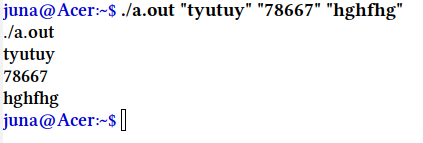

Нам часто придется сопоставлять символ и его ASCII-код. Составим для этого небольшую программку на языке С:

In [ ]:
#include <stdio.h>
int main()
{
  int s;
  printf("Введите символ: ");
  s = getchar();
  printf("это символ (%c ), а это его ASCII - код: (%d )\n", s,s);
  return 0;
}

Введите символ: 

Дополним нашу библиотеку функцией, которая преобразует строку в число. 

In [ ]:
;Function converting the string to the number
;input rsi - place of memory of begin string
;output rax - the number from the string
str_number:
    push rcx
    push rbx

    xor rax,rax
    xor rcx,rcx
.loop:
    xor     rbx, rbx
    mov     bl, byte [rsi+rcx]
    cmp     bl, 48
    jl      .finished
    cmp     bl, 57
    jg      .finished

    sub     bl, 48
    add     rax, rbx
    mov     rbx, 10
    mul     rbx
    inc     rcx
    jmp     .loop

.finished:
    cmp     rcx, 0
    je      .restore
    mov     rbx, 10
    div     rbx

.restore:
    pop rbx
    pop rcx
    ret

Посмотрим, как это работает:

In [ ]:
format ELF64

public _start

include 'func.asm'

place db "23453", 0

_start:
    mov rsi, place
    call str_number
    call exit